In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

In [2]:
fuel = pd.read_csv('Updated_CO2_Ratings.csv')
print(len(fuel))
print(len(fuel.columns))
fuel.head()

26146
16


,Unnamed: 0,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,1,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33.0,200.0,6.0,3.0
1,2,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,3,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,5,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [3]:
fuel.describe()

,Unnamed: 0,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,7155.000000,6045.000000
mean,1742.212499,2009.578521,3.353894,5.842806,13.886250,10.030341,12.151182,24.856613,276.079400,4.663312,4.675434
std,1443.376679,7.711948,1.341563,1.796811,3.742191,2.595455,3.189644,6.690478,65.827543,1.636609,1.790629
min,1.000000,1995.000000,0.800000,2.000000,4.000000,3.900000,4.000000,10.000000,94.000000,1.000000,1.000000
25%,545.000000,2004.000000,2.300000,4.000000,11.300000,8.300000,10.000000,20.000000,230.000000,4.000000,3.000000
50%,1197.000000,2010.000000,3.000000,6.000000,13.400000,9.600000,11.700000,24.000000,269.000000,5.000000,5.000000
75%,2831.000000,2016.000000,4.200000,8.000000,16.000000,11.400000,13.900000,28.000000,315.000000,6.000000,6.000000
max,5359.000000,2022.000000,8.400000,16.000000,33.300000,22.100000,27.500000,71.000000,633.000000,10.000000,8.000000


In [4]:
# Check for NAs
fuel.isna().sum()

Unnamed: 0                               0
Model Year                               0
Make                                     0
Model                                    0
Vehicle Class                            0
Engine Size(L)                           0
Cylinders                                0
Transmission                             0
Fuel Type                                0
Fuel Consumption (City (L/100 km)        0
Fuel Consumption(Hwy (L/100 km))         0
Fuel Consumption(Comb (L/100 km))        0
Fuel Consumption(Comb (mpg))             0
CO2 Emissions(g/km)                      0
CO2 Rating                           18991
Smog Rating                          20101
dtype: int64

In [5]:
# Number of unique values
fuel.nunique()

Unnamed: 0                           5359
Model Year                             28
Make                                   90
Model                                4695
Vehicle Class                          33
Engine Size(L)                         63
Cylinders                               9
Transmission                           30
Fuel Type                               5
Fuel Consumption (City (L/100 km)     238
Fuel Consumption(Hwy (L/100 km))      167
Fuel Consumption(Comb (L/100 km))     209
Fuel Consumption(Comb (mpg))           57
CO2 Emissions(g/km)                   379
CO2 Rating                             10
Smog Rating                             7
dtype: int64

In [6]:
# Pre-processing (Convert some car make data to correct string format)
fuel['Make'] = fuel['Make'].apply(lambda x: x.title())
fuel['Vehicle Class'] = fuel['Vehicle Class'].apply(lambda x: x.title())
fuel['Model'] = fuel['Model'].apply(lambda x: x.title())
# fuel = fuel.iloc[:,:-2]
fuel.head()

,Unnamed: 0,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,1,2022,Acura,Ilx,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33.0,200.0,6.0,3.0
1,2,2022,Acura,Mdx Sh-Awd,Suv: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,3,2022,Acura,Rdx Sh-Awd,Suv: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,4,2022,Acura,Rdx Sh-Awd A-Spec,Suv: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,5,2022,Acura,Tlx Sh-Awd,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [7]:
fuel['Vehicle Class'].sort_values().unique()

array(['Compact', 'Full-Size', 'Mid-Size', 'Minicompact', 'Minivan',
       'Pickup Truck - Small', 'Pickup Truck - Standard',
       'Pickup Truck: Small', 'Pickup Truck: Standard',
       'Special Purpose Vehicle', 'Station Wagon - Mid-Size',
       'Station Wagon - Small', 'Station Wagon: Mid-Size',
       'Station Wagon: Small', 'Subcompact', 'Suv', 'Suv - Small',
       'Suv - Standard', 'Suv: Small', 'Suv: Standard', 'Two-Seater',
       'Ul', 'Van - Cargo', 'Van - Passenger', 'Van: Passenger'],
      dtype=object)

In [8]:
# Trend of car types
# Group them together first
fuel['Vehicle Class 1'] = fuel['Vehicle Class']
fuel.loc[fuel['Vehicle Class'].str.contains('Suv'),'Vehicle Class 1'] = 'SUV'
fuel.loc[fuel['Vehicle Class'].str.contains('Pickup'),'Vehicle Class 1'] = 'Pickup Truck'
fuel.loc[fuel['Vehicle Class'].str.contains('Station'),'Vehicle Class 1'] = 'Station Wagon'
fuel.loc[fuel['Vehicle Class'].str.contains('Van'),'Vehicle Class 1'] = 'Van'

# There's a vehicle class called 'UL' with only 1 record. So, drop it from the data
fuel = fuel[fuel['Vehicle Class 1'] != 'Ul']

In [9]:
print(len(fuel))

26145


In [10]:
# Try grouping transmission types together
fuel['Transmission Type'] = fuel['Transmission'].apply(lambda x: re.findall('([A-Z]+)', x)[0])
fuel['Transmission Type'].unique()

array(['AM', 'AS', 'A', 'M', 'AV'], dtype=object)

<AxesSubplot:>

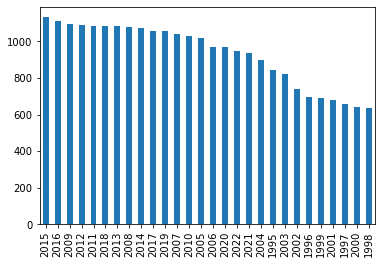

In [11]:
# Check for counts within each column
fuel['Model Year'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

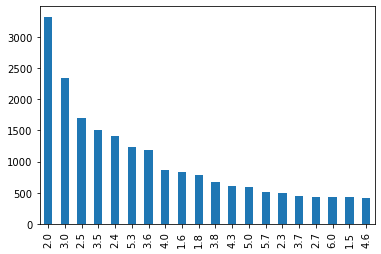

In [12]:
# Check for counts within each column
fuel['Engine Size(L)'].value_counts().iloc[:20].plot(kind = 'bar')

<AxesSubplot:>

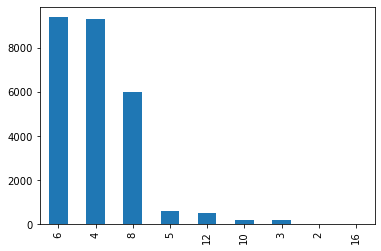

In [13]:
fuel['Cylinders'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

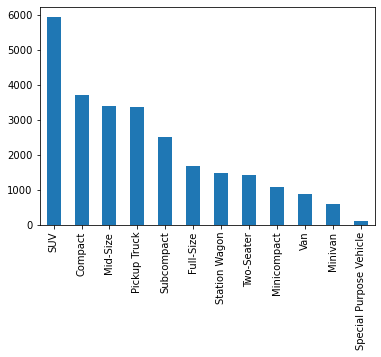

In [14]:
fuel['Vehicle Class 1'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

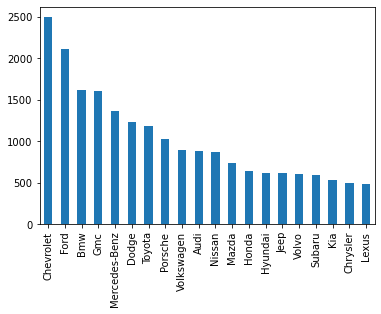

In [15]:
fuel['Make'].value_counts().iloc[:20].plot(kind = 'bar')

<AxesSubplot:>

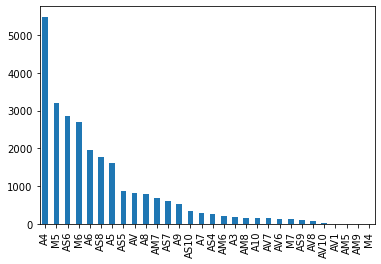

In [16]:
fuel['Transmission'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

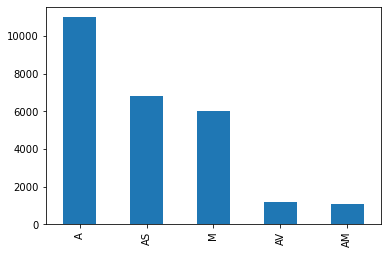

In [17]:
fuel['Transmission Type'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

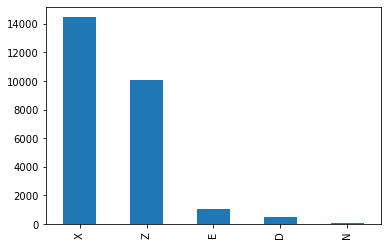

In [18]:
fuel['Fuel Type'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

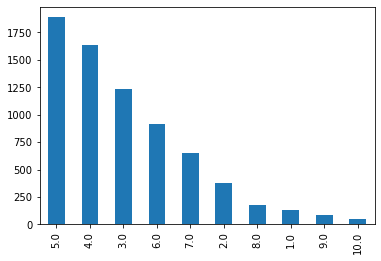

In [19]:
fuel['CO2 Rating'].value_counts().plot(kind = 'bar')

In [20]:
fuel.columns

Index(['Unnamed: 0', 'Model Year', 'Make', 'Model', 'Vehicle Class',
       'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating', 'Vehicle Class 1',
       'Transmission Type'],
      dtype='object')

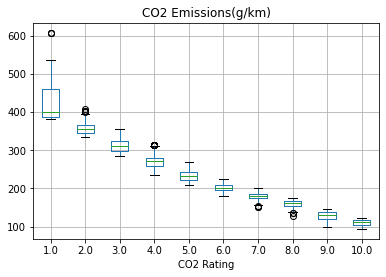

In [21]:
# Relation between CO2 emissions & CO2 rating?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'CO2 Rating')
plt.suptitle('')
plt.show()

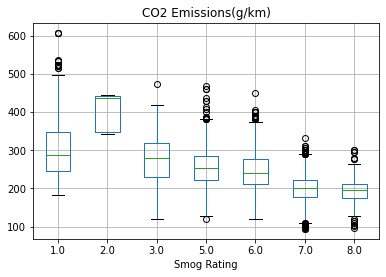

In [22]:
# Relation between CO2 emissions & smog rating?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Smog Rating')
plt.suptitle('')
plt.show()

# CO2 emissions decreases but there is significant overlap between different smog ratings

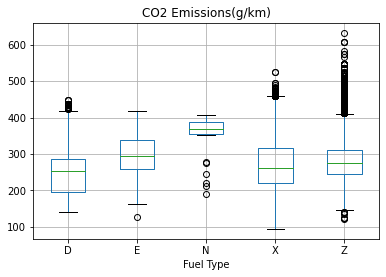

In [23]:
# Relation between CO2 emissions & fuel type?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Fuel Type')
plt.suptitle('')
plt.show()

# Not much difference between the fuel types. However, Z has some outliers

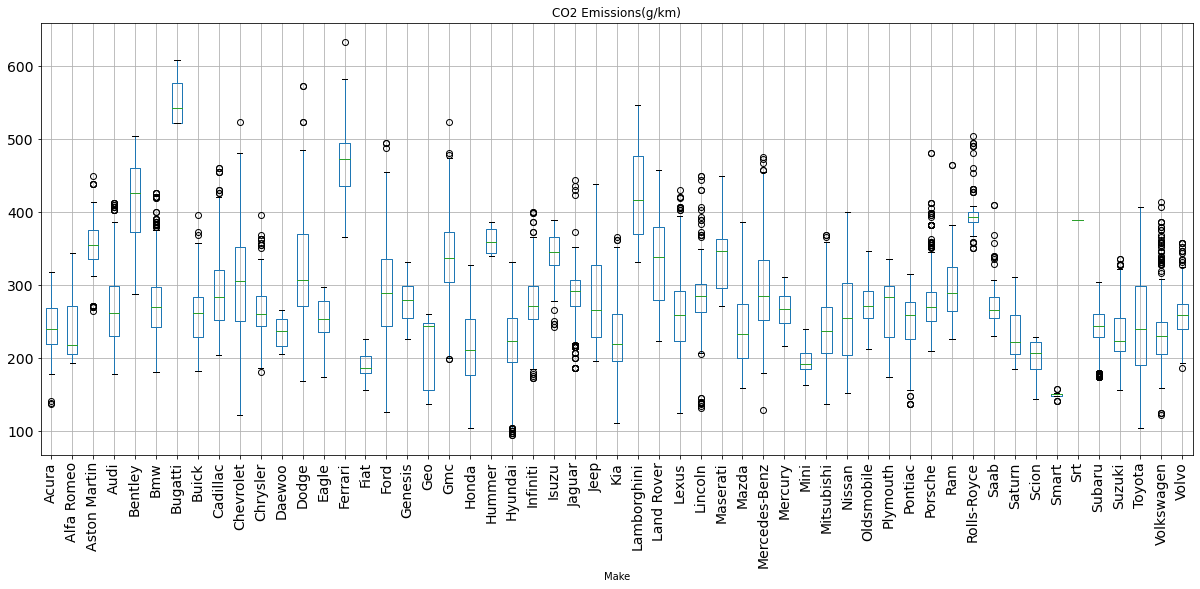

In [24]:
# Relation between car manufacturers & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Make', figsize = (20,8), fontsize = 14, rot = 90)
plt.suptitle('')
plt.show()

# Luxury cars have higher CO2 emissions

<AxesSubplot:>

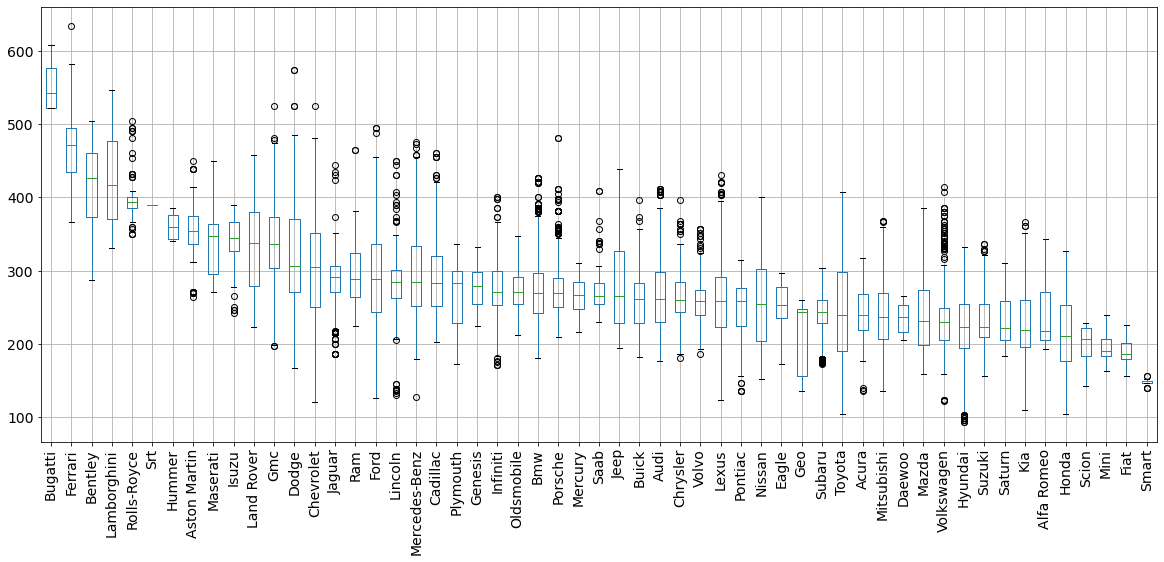

In [25]:
# Sort by median CO2 emissions
# fuel.groupby(['Make','CO2 Emissions(g/km)'])
fuel_make = pd.DataFrame({col:vals['CO2 Emissions(g/km)'] for col, vals in fuel.groupby(['Make'])})
fuel_make[fuel_make.median().sort_values(ascending = False).index].boxplot(figsize = (20,8), fontsize = 14, rot = 90)

# High emissions
# Bugatti, RR, Lamborghini, Bentley, Aston Martin, Dodge - Luxury cars
# GMC - Pickup trucks

# Low emissions
# Honda, Toyota, Hyundai, Nissan, Kia - Affordable vehicle brands (Asian)

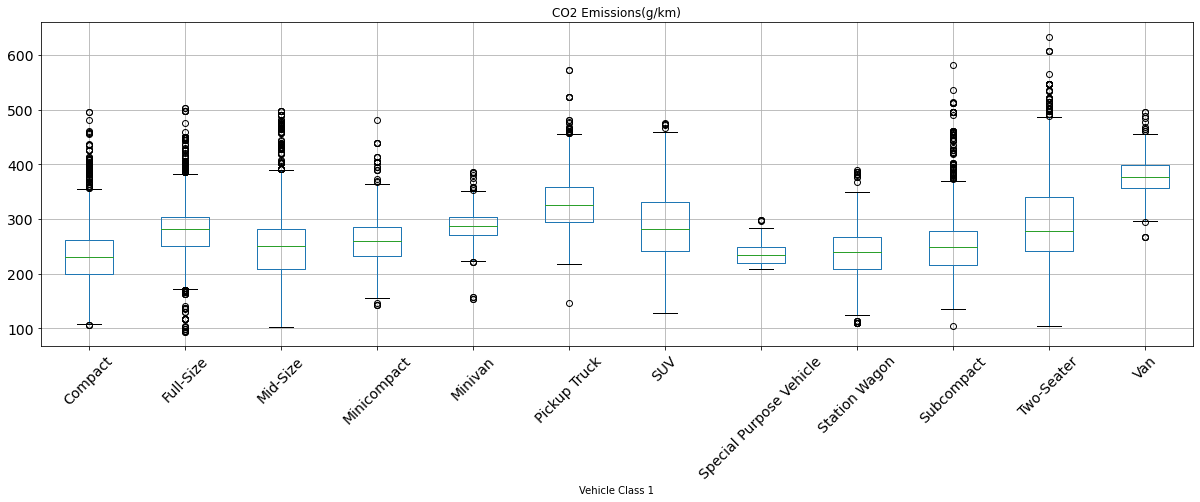

In [26]:
# Relation between vehicle type & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Vehicle Class 1', figsize = (20,6), fontsize = 14, rot = 45)
plt.suptitle('') 
plt.show()

# Not clear if any relation

<AxesSubplot:>

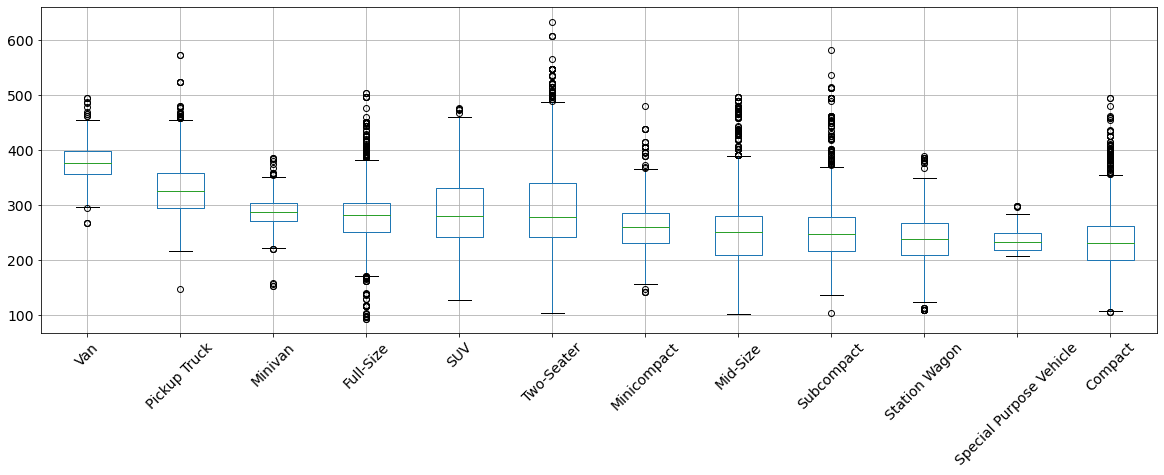

In [27]:
# Sort by median CO2 emissions
# fuel.groupby(['Make','CO2 Emissions(g/km)'])
fuel_make = pd.DataFrame({col:vals['CO2 Emissions(g/km)'] for col, vals in fuel.groupby(['Vehicle Class 1'])})
fuel_make[fuel_make.median().sort_values(ascending = False).index].boxplot(figsize = (20,6), fontsize = 14, rot = 45)

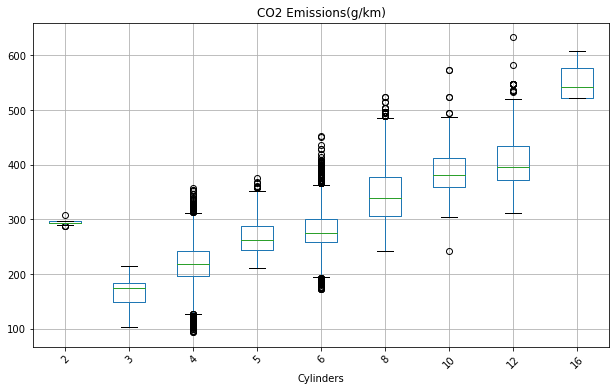

In [28]:
# Relation between # of cylinders & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Cylinders', figsize = (10,6), rot = 45)
plt.suptitle('')
plt.show()

# More the cylinders, more the emissions

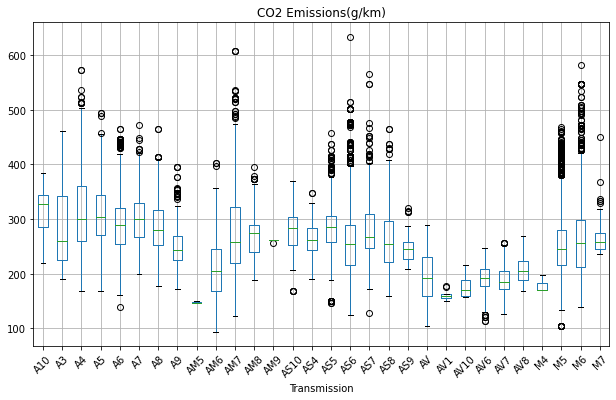

In [29]:
# Relation between transmission type & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Transmission', figsize = (10,6), rot = 45)
plt.suptitle('')
plt.show()

# Some transmissions (AV) have very low emissions

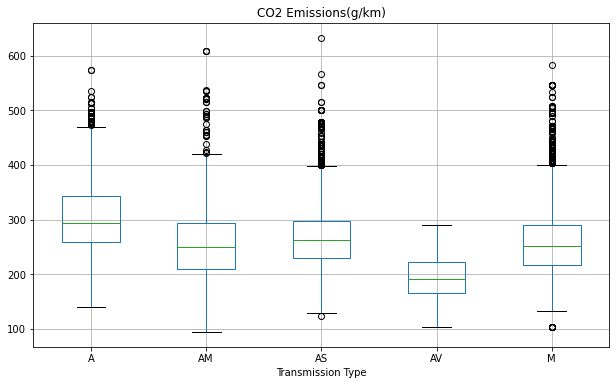

In [30]:
# Relation between transmission type & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Transmission Type', figsize = (10,6))
plt.suptitle('')
plt.show()

# Some transmissions (AV) have very low emissions

<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

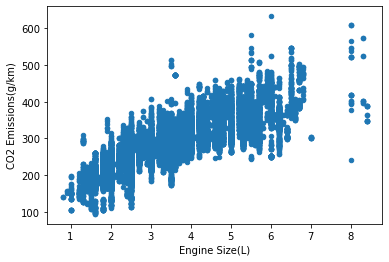

In [31]:
# # Relation between engine size & CO2 emissions?
# fuel[['CO2 Emissions(g/km)','Engine Size(L)']].plot.scatter(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)')
fuel[['CO2 Emissions(g/km)','Engine Size(L)']].plot(x = 'Engine Size(L)', y= 'CO2 Emissions(g/km)',kind = 'scatter')
# # As engine size increases, CO2 emissions increases as well

<AxesSubplot:xlabel='Fuel Consumption (City (L/100 km)', ylabel='CO2 Emissions(g/km)'>

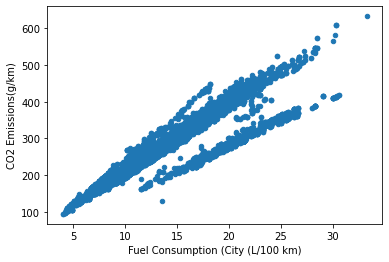

In [32]:
# Relation between fuel consumption (City) & CO2 emissions?
fuel.plot.scatter(x = 'Fuel Consumption (City (L/100 km)', y = 'CO2 Emissions(g/km)')

# As fuel consumption (City) increases, CO2 emissions increases as well

<AxesSubplot:xlabel='Fuel Consumption(Hwy (L/100 km))', ylabel='CO2 Emissions(g/km)'>

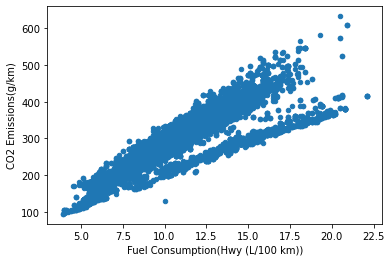

In [33]:
# Relation between fuel consumption (Highway) & CO2 emissions?
fuel.plot.scatter(x = 'Fuel Consumption(Hwy (L/100 km))', y = 'CO2 Emissions(g/km)')

# As fuel consumption (Hwy) increases, CO2 emissions increases as well

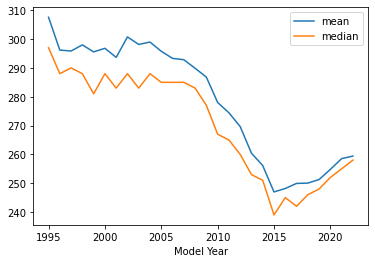

In [34]:
# Relation between model year & CO2 emissions?
fuel.groupby('Model Year')['CO2 Emissions(g/km)'].mean().plot(label = 'mean')
fuel.groupby('Model Year')['CO2 Emissions(g/km)'].median().plot(label = 'median').legend(loc = 'best')
plt.show()

In [35]:
# Correlations with CO2 emissions
fuel.corr()['CO2 Emissions(g/km)']

# Fuel consumption is highly positively correlated
# # of cylinders & Engine size are significantly correlated
# Exclude CO2 rating & Fuel Consumption (Comb) from the model

Unnamed: 0                           0.034189
Model Year                          -0.279340
Engine Size(L)                       0.825534
Cylinders                            0.790384
Fuel Consumption (City (L/100 km)    0.929733
Fuel Consumption(Hwy (L/100 km))     0.907995
Fuel Consumption(Comb (L/100 km))    0.932461
Fuel Consumption(Comb (mpg))        -0.905091
CO2 Emissions(g/km)                  1.000000
CO2 Rating                          -0.948207
Smog Rating                         -0.444386
Name: CO2 Emissions(g/km), dtype: float64

In [36]:
# Correlations with Smog Rating
fuel.corr()['Smog Rating']
# We could do classification on smog rating as it doesn't seem to be correlated with other features

Unnamed: 0                           0.075592
Model Year                          -0.067740
Engine Size(L)                      -0.389269
Cylinders                           -0.407188
Fuel Consumption (City (L/100 km)   -0.430058
Fuel Consumption(Hwy (L/100 km))    -0.372386
Fuel Consumption(Comb (L/100 km))   -0.416772
Fuel Consumption(Comb (mpg))         0.408217
CO2 Emissions(g/km)                 -0.444386
CO2 Rating                           0.447007
Smog Rating                          1.000000
Name: Smog Rating, dtype: float64

In [37]:
# Correlation matrix
fuel.corr().round(2)

# Highly correlated features:
# Engine size & cylinders
# Fuel consumption & CO2 emissions

,Unnamed: 0,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Unnamed: 0,1.00,-0.21,0.03,0.01,0.07,0.06,0.06,-0.06,0.03,0.17,0.08
Model Year,-0.21,1.00,-0.05,-0.04,-0.25,-0.25,-0.25,0.27,-0.28,-0.14,-0.07
Engine Size(L),0.03,-0.05,1.00,0.91,0.82,0.76,0.81,-0.76,0.83,-0.77,-0.39
Cylinders,0.01,-0.04,0.91,1.00,0.79,0.70,0.76,-0.71,0.79,-0.76,-0.41
Fuel Consumption (City (L/100 km),0.07,-0.25,0.82,0.79,1.00,0.95,0.99,-0.93,0.93,-0.89,-0.43
Fuel Consumption(Hwy (L/100 km)),0.06,-0.25,0.76,0.70,0.95,1.00,0.98,-0.89,0.91,-0.87,-0.37
Fuel Consumption(Comb (L/100 km)),0.06,-0.25,0.81,0.76,0.99,0.98,1.00,-0.92,0.93,-0.90,-0.42
Fuel Consumption(Comb (mpg)),-0.06,0.27,-0.76,-0.71,-0.93,-0.89,-0.92,1.00,-0.91,0.93,0.41
CO2 Emissions(g/km),0.03,-0.28,0.83,0.79,0.93,0.91,0.93,-0.91,1.00,-0.95,-0.44
CO2 Rating,0.17,-0.14,-0.77,-0.76,-0.89,-0.87,-0.90,0.93,-0.95,1.00,0.45


<AxesSubplot:title={'center':'CO2 Emissions(g/km)'}, xlabel='Car Name'>

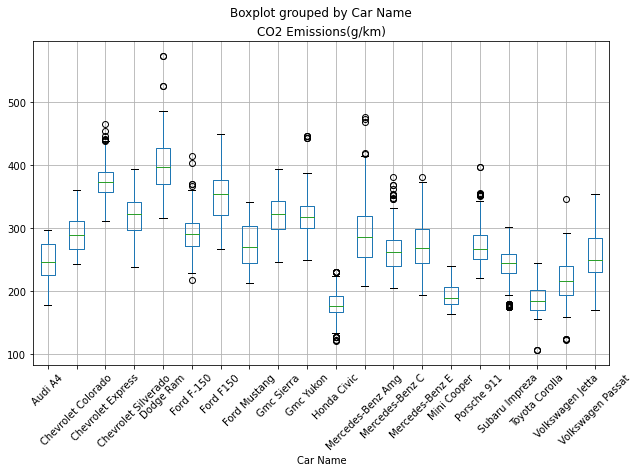

In [38]:
# fuel['First Word'] = fuel['Model'].apply(lambda x: x.split()[0])
# fuel['First Word'].value_counts()[:20].index.values
fuel['Car Name'] = fuel['Make'] + ' ' + fuel['Model'].apply(lambda x: x.split()[0])

fuel[fuel['Car Name'].isin(fuel['Car Name'].value_counts()[:20].index.values)].boxplot(column = 'CO2 Emissions(g/km)', by = 'Car Name', figsize = (10,6), rot = 45)
# fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'First Word', figsize = (10,6), rot = 45)
# plt.suptitle('')
# plt.show()

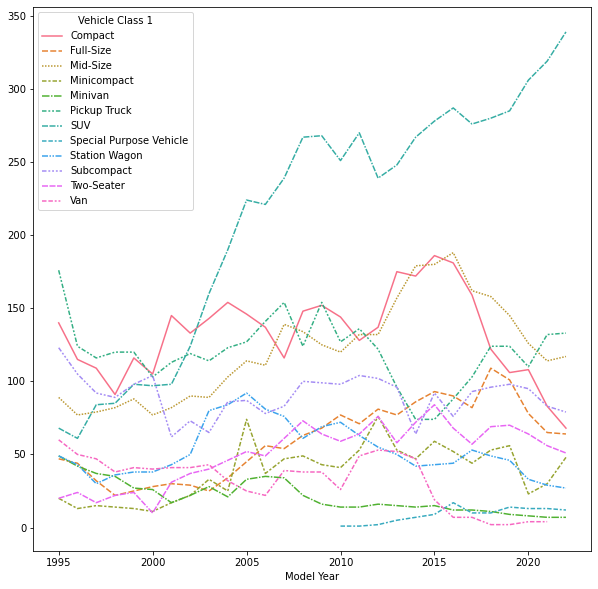

In [39]:
fig, ax = plt.subplots(figsize = (10,10))
sns.lineplot(ax = ax, data = pd.DataFrame(fuel.groupby(['Model Year','Vehicle Class 1'])['Vehicle Class 1'].size().unstack()))
plt.show()
# SUVs have been manufactured a lot more in the past 10-15 years.
# Pickup Trucks have rebounded after a few down years from 2014-16.
# Compact, Mid-size & Vans have been decreasing in last 5-7 years.

In [40]:
# Drop unneccessary columns
cols_to_drop = ['Model', 'Vehicle Class', 'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))', \
               'CO2 Rating', 'Smog Rating']
fuel.drop(cols_to_drop, axis = 1, inplace = True)
fuel.columns

Index(['Unnamed: 0', 'Model Year', 'Make', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption (City (L/100 km)',
       'Fuel Consumption(Hwy (L/100 km))', 'CO2 Emissions(g/km)',
       'Vehicle Class 1', 'Transmission Type', 'Car Name'],
      dtype='object')

In [41]:
fuel.drop(['Unnamed: 0'], axis = 1)

,Model Year,Make,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),CO2 Emissions(g/km),Vehicle Class 1,Transmission Type,Car Name
0,2022,Acura,2.4,4,AM8,Z,9.9,7.0,200.0,Compact,AM,Acura Ilx
1,2022,Acura,3.5,6,AS10,Z,12.6,9.4,263.0,SUV,AS,Acura Mdx
2,2022,Acura,2.0,4,AS10,Z,11.0,8.6,232.0,SUV,AS,Acura Rdx
3,2022,Acura,2.0,4,AS10,Z,11.3,9.1,242.0,SUV,AS,Acura Rdx
4,2022,Acura,2.0,4,AS10,Z,11.2,8.0,230.0,Compact,AS,Acura Tlx
...,...,...,...,...,...,...,...,...,...,...,...,...
26141,1999,Volvo,2.3,5,A4,Z,13.4,9.4,267.0,Station Wagon,A,Volvo V70
26142,1999,Volvo,2.3,5,M5,Z,13.4,9.4,267.0,Station Wagon,M,Volvo V70
26143,1999,Volvo,2.4,5,A4,Z,13.1,9.1,260.0,Station Wagon,A,Volvo V70
26144,1999,Volvo,2.4,5,M5,Z,12.7,9.0,253.0,Station Wagon,M,Volvo V70


In [42]:
#Defining X and Y for Random Forests
X_rf = fuel.loc[:,fuel.columns != 'CO2 Emissions(g/km)']
X_rf

,Unnamed: 0,Model Year,Make,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Vehicle Class 1,Transmission Type,Car Name
0,1,2022,Acura,2.4,4,AM8,Z,9.9,7.0,Compact,AM,Acura Ilx
1,2,2022,Acura,3.5,6,AS10,Z,12.6,9.4,SUV,AS,Acura Mdx
2,3,2022,Acura,2.0,4,AS10,Z,11.0,8.6,SUV,AS,Acura Rdx
3,4,2022,Acura,2.0,4,AS10,Z,11.3,9.1,SUV,AS,Acura Rdx
4,5,2022,Acura,2.0,4,AS10,Z,11.2,8.0,Compact,AS,Acura Tlx
...,...,...,...,...,...,...,...,...,...,...,...,...
26141,3515,1999,Volvo,2.3,5,A4,Z,13.4,9.4,Station Wagon,A,Volvo V70
26142,3516,1999,Volvo,2.3,5,M5,Z,13.4,9.4,Station Wagon,M,Volvo V70
26143,3517,1999,Volvo,2.4,5,A4,Z,13.1,9.1,Station Wagon,A,Volvo V70
26144,3518,1999,Volvo,2.4,5,M5,Z,12.7,9.0,Station Wagon,M,Volvo V70


In [43]:
Y_rf = fuel.loc[:,'CO2 Emissions(g/km)']


In [44]:
from sklearn.model_selection import train_test_split
from patsy import dmatrices

In [45]:
fuel.rename(columns = {'CO2 Emissions(g/km)':'CO2_Emissions_g_per_km','Fuel Consumption (City (L/100 km)' : 'Fuel_Consumption_City_L_per_100km', 'Model Year':'Model_Year', 'Engine Size(L)':'Engine_Size_L','Fuel Type':'Fuel_Type','Fuel Consumption(Hwy (L/100 km))':'Fuel_Consumption_Hwy_L_per_100km','Vehicle Class 1':'Vehicle_Class_1', 'Transmission Type':'Transmission_Type', 'Car Name':'Car_Name'}, inplace = True)
fuel.head()

,Unnamed: 0,Model_Year,Make,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_per_100km,Fuel_Consumption_Hwy_L_per_100km,CO2_Emissions_g_per_km,Vehicle_Class_1,Transmission_Type,Car_Name
0,1,2022,Acura,2.4,4,AM8,Z,9.9,7.0,200.0,Compact,AM,Acura Ilx
1,2,2022,Acura,3.5,6,AS10,Z,12.6,9.4,263.0,SUV,AS,Acura Mdx
2,3,2022,Acura,2.0,4,AS10,Z,11.0,8.6,232.0,SUV,AS,Acura Rdx
3,4,2022,Acura,2.0,4,AS10,Z,11.3,9.1,242.0,SUV,AS,Acura Rdx
4,5,2022,Acura,2.0,4,AS10,Z,11.2,8.0,230.0,Compact,AS,Acura Tlx


In [46]:
# # formula = 'is_spam ~ ' + ' + '.join(['Q("'+x+'")' \
# #                                     for x in df.columns.values\
# #                                     if x != 'is_spam'])
# for x in fuel.columns:
#     print(x.replace("!@#$%^&*()[]{};:,./<>?\|`~-=_+", "_"))
fuel.columns

Index(['Unnamed: 0', 'Model_Year', 'Make', 'Engine_Size_L', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_L_per_100km',
       'Fuel_Consumption_Hwy_L_per_100km', 'CO2_Emissions_g_per_km',
       'Vehicle_Class_1', 'Transmission_Type', 'Car_Name'],
      dtype='object')

In [47]:
formula_rf = 'CO2_Emissions_g_per_km ~ Model_Year + Make + Engine_Size_L + Cylinders + Transmission + Fuel_Type + Fuel_Consumption_City_L_per_100km + Fuel_Consumption_Hwy_L_per_100km + Vehicle_Class_1'

In [48]:
Y_rf, X_rf = dmatrices(formula_rf, data = fuel , return_type = 'dataframe')
Y_rf,X_rf
y = Y_rf['CO2_Emissions_g_per_km'].values

In [49]:
X_train, X_test,Y_train,Y_test = train_test_split(X_rf,y,random_state = 100,test_size=0.2)

In [55]:
X_train

,Intercept,Make[T.Alfa Romeo],Make[T.Aston Martin],Make[T.Audi],Make[T.Bentley],Make[T.Bmw],Make[T.Bugatti],Make[T.Buick],Make[T.Cadillac],Make[T.Chevrolet],...,Vehicle_Class_1[T.Special Purpose Vehicle],Vehicle_Class_1[T.Station Wagon],Vehicle_Class_1[T.Subcompact],Vehicle_Class_1[T.Two-Seater],Vehicle_Class_1[T.Van],Model_Year,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_per_100km,Fuel_Consumption_Hwy_L_per_100km
17022,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2008.0,4.0,6.0,14.7,11.2
24749,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1997.0,1.3,4.0,8.9,7.5
11150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2012.0,6.0,12.0,22.8,15.0
22695,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1995.0,4.6,8.0,18.8,12.3
13134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2014.0,5.0,8.0,15.8,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013.0,2.4,4.0,10.5,7.4
24424,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1997.0,4.6,8.0,18.6,14.2
14147,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2005.0,2.7,6.0,13.7,9.7
23321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1995.0,2.0,4.0,13.4,9.5


In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth =10, random_state = 1)

In [57]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [58]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([293.461909  , 300.87043471, 241.11871561, ..., 192.82162855,
       257.1800245 , 211.2149295 ])

In [59]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_test,y_pred_rf ))

3.051214057912169

In [60]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

### RF with basic parameters defination

##### Split the training into train and validation

In [61]:
X_train_final,X_valid,Y_train_final, Y_valid = train_test_split(X_train,Y_train,random_state = 100,test_size=0.5)
X_valid

,Intercept,Make[T.Alfa Romeo],Make[T.Aston Martin],Make[T.Audi],Make[T.Bentley],Make[T.Bmw],Make[T.Bugatti],Make[T.Buick],Make[T.Cadillac],Make[T.Chevrolet],...,Vehicle_Class_1[T.Special Purpose Vehicle],Vehicle_Class_1[T.Station Wagon],Vehicle_Class_1[T.Subcompact],Vehicle_Class_1[T.Two-Seater],Vehicle_Class_1[T.Van],Model_Year,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_per_100km,Fuel_Consumption_Hwy_L_per_100km
20919,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2003.0,2.0,4.0,10.0,7.8
17634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2008.0,2.5,4.0,12.0,8.7
9434,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011.0,4.4,8.0,17.3,11.4
23859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1996.0,2.5,4.0,13.6,11.1
6097,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016.0,4.0,8.0,13.3,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2006.0,2.0,4.0,12.0,9.4
8424,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2010.0,3.0,6.0,13.6,9.7
7515,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2015.0,8.4,10.0,19.4,11.3
22940,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1995.0,1.8,4.0,11.0,8.5


In [62]:
num_trees = 150 

model_rf_sample_params = RandomForestRegressor(n_estimators = num_trees, max_depth = 5)
model_rf_sample_params.fit(X_train_final, Y_train_final)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [63]:
Y_valid_pred = model_rf_sample_params.predict(X_valid)
Y_train_pred = model_rf_sample_params.predict(X_train_final)
print('validation set RMSE : ', math.sqrt(mean_squared_error(Y_valid,Y_valid_pred)))
print('training set RMSE : ', math.sqrt(mean_squared_error(Y_train_final,Y_train_pred)))

validation set RMSE :  8.952261887884458
training set RMSE :  8.600832274415945


In [64]:
# for tree in model_rf_sample_params.estimators_:
#     print()



# Hyperparameter tuning

In [65]:
# n_estimators_list = list(range(10,200,20))
# criterion_list = ['squared_error']
# max_depth_list = list(range(5,30,5))
# #max_depth_list.append(None)
# min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
# min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
# max_features_list = ['Auto']

# params_grid = {
#     'n_estimators' : n_estimators_list,
#     'criterion': criterion_list,
#     'max_depth': max_depth_list,
#     'min_samples_split': min_samples_split_list,
#     'min_samples_leaf': min_samples_leaf_list,
#     'max_features': max_features_list
    
# }


# num_combinations = 1
# for k in params_grid.keys(): num_combinations *= len(params_grid[k])

# print('Number of combinations = ', num_combinations)
# params_grid

In [66]:
# from sklearn.model_selection import GridSearchCV

# def RMSE_score(model, X, y): return metrics.mean_squared_error(y, model.predict(X))
# model_rf_CV = GridSearchCV(estimator = RandomForestRegressor(), param_grid = params_grid, cv = 10, scoring = RMSE_score, return_train_score=True)

# model_rf_CV.fit(X_train_final, Y_train_final)

In [67]:
from sklearn import model_selection
from sklearn import metrics
def cv_rmse_random_forest(x,y,num_trees):
    model = RandomForestRegressor(n_estimators=num_trees,
                                       max_depth=10,
                                       random_state=1)
    RMSE_list = []
    kfold = model_selection.StratifiedKFold(n_splits = 4, shuffle = True).split(X_train,Y_train)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train_cv = X_train.iloc[train]
        X_holdout = X_train.iloc[holdout]
        y_train_cv = Y_train[train]
        y_holdout = Y_train[holdout]
        #print(train)
        
        # Fit the model
        model.fit(X_train_cv, y_train_cv)
        # Compute test accuracy
        rmse = math.sqrt(metrics.mean_squared_error(y_holdout, model.predict(X_holdout)))
        RMSE_list.append(rmse)

        average_rmse = pd.Series(RMSE_list).mean()
    print('Fitted', num_trees)
#     print(model)
    return average_rmse

/Users/sreekarl/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Fitted 10


/Users/sreekarl/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Fitted 30


/Users/sreekarl/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Fitted 50


/Users/sreekarl/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Fitted 70


/Users/sreekarl/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Fitted 90


/Users/sreekarl/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Fitted 110


/Users/sreekarl/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Fitted 130


Text(0, 0.5, 'Mean Squared error')

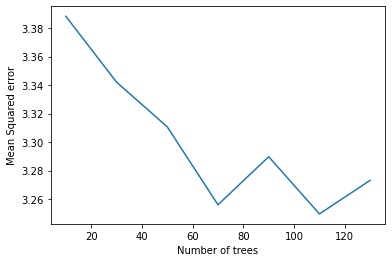

In [68]:
# Random Forest optimization
# Let's optimize number of trees first

#num_trees_range = [50, 100, 200, 300, 400,500,600,700,800,900,1000]
num_trees_range = list(range(10, 150, 20))
scores = [cv_rmse_random_forest(X_train, Y_train, num_trees) for num_trees in num_trees_range]

plt.plot(num_trees_range, scores)
plt.xlabel('Number of trees')
plt.ylabel('Mean Squared error')

In [69]:
Y_train.shape

(20916,)

In [80]:
RMSE_scores = []
for num_trees in [50, 100, 200, 300, 400]:
        print(num_trees)
        model = RandomForestRegressor(n_estimators=num_trees,
                                       max_depth=2, 
                                       random_state=1)
        model.fit(X_train, Y_train)
        rmse = math.sqrt(metrics.mean_squared_error(Y_train, model.predict(X_train)))
        RMSE_scores.append(rmse)
    

50
100
200
300
400


In [91]:
('Average RMSE when we vary number of trees in Random Forest - ',sum(RMSE_scores)/len(RMSE_scores))

Average RMSE when we vary number of trees in Random Forest -  27.537426406672203
